In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
from tensorflow.keras.preprocessing.image import load_img

img_dog = load_img('img/dog.jpg', target_size=(224, 224))
img_cat = load_img('img/cat.jpg', target_size=(224, 224))

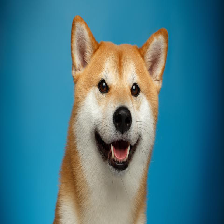

In [4]:
img_dog

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array

arr_cat = img_to_array(img_cat)
arr_dog = img_to_array(img_dog)

In [6]:
arr_dog

array([[[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       [[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       [[  1.,  61.,  89.],
        [  2.,  63.,  91.],
        [  1.,  65.,  92.],
        ...,
        [  2.,  39.,  65.],
        [  2.,  38.,  62.],
        [  1.,  36.,  58.]],

       ...,

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  80., 118.],
        ...,
        [  2.,  38.,  62.],
        [  2.,  37.,  57.],
        [  2.,  35.,  54.]],

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  80., 118.],
        ...,
        [  2.,  38.,  62.],
        [  2.,  37.,  57.],
        [  2.,  35.,  54.]],

       [[  2.,  76., 115.],
        [  3.,  78., 117.],
        [  2.,  

In [7]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# preprocess_input是給vgg16用的

arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)

In [8]:
arr_dog

array([[[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       [[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       [[ -14.939003,  -55.779   , -122.68    ],
        [ -12.939003,  -53.779   , -121.68    ],
        [ -11.939003,  -51.779   , -122.68    ],
        ...,
        [ -38.939003,  -77.779   , -121.68    ],
        [ -41.939003,  -78.779   , -121.68    ],
        [ -45.939003,  -80.779   , -122.68    ]],

       ...,

       [[  11.060997,  -40.779   , -121.68    ],
        [  

In [9]:
import numpy as np

arr_input = np.stack([arr_dog, arr_cat])

In [10]:
arr_input.shape

(2, 224, 224, 3)

In [11]:
probs = model.predict(arr_input)

print(probs.shape)

(2, 1000)


In [12]:
probs

array([[8.0769314e-07, 1.5332682e-05, 4.9159025e-06, ..., 8.5417349e-07,
        1.8960727e-05, 9.3308125e-05],
       [5.0006486e-07, 5.4917501e-07, 7.1321847e-07, ..., 1.4433091e-07,
        4.9464375e-06, 7.9034311e-05]], dtype=float32)

In [13]:
from tensorflow.keras.applications.vgg16 import decode_predictions

results = decode_predictions(probs)

In [14]:
results[0]

[('n02113023', 'Pembroke', 0.28141773),
 ('n02115641', 'dingo', 0.23713641),
 ('n02109961', 'Eskimo_dog', 0.1773607),
 ('n02110806', 'basenji', 0.1573173),
 ('n02110185', 'Siberian_husky', 0.0663174)]

In [15]:
%matplotlib inline

In [16]:
# Output layer does not included
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#def build_transfer_model_functional(vgg16):
#    dense_0 = layers.Dense(units=512, activation='relu')(vgg16)   
#    return model

def build_transfer_model(vgg16):

    model = Sequential(vgg16.layers)
    
    for layer in model.layers[:15]:
        layer.trainable = False
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model
    

In [19]:
model = build_transfer_model(vgg16)

In [20]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=1e-4, momentum=0.9),
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

idg_train = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

img_itr_train = idg_train.flow_from_directory(
    'img/shrine_temple/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
    
)

img_itr_validation = idg_train.flow_from_directory(
    'img/shrine_temple/validation',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
    
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [23]:
type(img_itr_train)

keras.preprocessing.image.DirectoryIterator

In [24]:
import os
from datetime import datetime

model_dir = os.path.join(
    'models',
    datetime.now().strftime('%y%m%d_%H%M')
)

print(model_dir)

os.makedirs(model_dir, exist_ok=True)

dir_weights = os.path.join(model_dir, 'weights')

os.makedirs(dir_weights, exist_ok=True)


models/211124_0159


In [25]:
import json
import pickle

model_json = os.path.join(model_dir, 'model.json')
with open(model_json, 'w') as f:
    json.dump(model.to_json(), f)

model_classes = os.path.join(model_dir, 'classes.pkl')
with open(model_classes, 'wb') as f:
    pickle.dump(img_itr_train.class_indices, f)

In [26]:
import math


batch_size = 16
steps_per_epoch = math.ceil(
    img_itr_train.samples/batch_size
)

print(steps_per_epoch)

validation_steps = math.ceil(
    img_itr_validation.samples/batch_size
)

38


In [27]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger

cp_filepath = os.path.join(dir_weights, 'ep_{epoch:02d}_ls_{loss:.1f}:.h5')

cp = ModelCheckpoint(
    cp_filepath,
    monitor='loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    save_freq=5
)

csv_filepath = os.path.join(model_dir, 'loss.csv')
csv = CSVLogger(csv_filepath, append=True)

In [29]:
n_epoch = 5

history = model.fit(
    img_itr_train,
    steps_per_epoch=steps_per_epoch,
    epochs=n_epoch,
    validation_data=img_itr_validation,
    validation_steps=validation_steps,
    callbacks= [cp, csv],
    verbose=1

)


Epoch 1/5
38/38 [==============================] - 44s 1s/step - loss: 0.7028 - accuracy: 0.5883 - val_loss: 0.4662 - val_accuracy: 0.8600
Epoch 2/5
38/38 [==============================] - 47s 1s/step - loss: 0.4736 - accuracy: 0.8000 - val_loss: 0.3544 - val_accuracy: 0.8950
Epoch 3/5
38/38 [==============================] - 48s 1s/step - loss: 0.3929 - accuracy: 0.8283 - val_loss: 0.3271 - val_accuracy: 0.8800
Epoch 4/5
38/38 [==============================] - 48s 1s/step - loss: 0.3708 - accuracy: 0.8450 - val_loss: 0.2702 - val_accuracy: 0.9150
Epoch 5/5
38/38 [==============================] - 47s 1s/step - loss: 0.3249 - accuracy: 0.8567 - val_loss: 0.2544 - val_accuracy: 0.9150


In [30]:
from utils import load_random_imgs

test_data_dir = 'img/shrine_temple/test/unknown'
x_test, true_labels = load_random_imgs(
    test_data_dir,
    seed=1
)

x_test_preproc = preprocess_input(x_test.copy())/255.
probs = model.predict(x_test_preproc)


In [45]:
print(true_labels)

['shrine', 'temple', 'shrine', 'shrine', 'shrine', 'shrine', 'temple', 'shrine']


In [98]:
import matplotlib.pyplot as plt

def imshow_with_title(ax, img, title):
        ax.imshow(img / 255.)
        ax.set_title(title)
        ax.axis('off')
        return ax
def show_img_samples(imgs, labels, ncols=4, save_fig=None):    
    n = len(imgs)
    nrows = math.ceil(n / ncols)
    
    #設置4*2的顯示
    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(4 * ncols, 4 * nrows))
    
    for ax, img, label in zip(axes.ravel(), imgs, labels):
        ax = imshow_with_title(ax, img, label) 
    if save_fig:
        fig.savefig(save_fig)
    # fig.show()

def get_pred_sample_labels(probs, class_indices):
    class_labels = {idx: label for label, idx in class_indices.items()}
    tmp = '{}:{:.3f}  /  {}:{:.3f}'
    lbls = [tmp.format(class_labels[0], 1- p[0], class_labels[1], p[0])
                    for p in probs]
    return lbls
    
def show_test_samples(imgs, probs, class_indices, true_labels):
    pred_labels = get_pred_sample_labels(probs, class_indices)
    #print(pred_labels)
    labels = [p + '\n' + 'True:' + t for p, t in zip(pred_labels, true_labels)]
    
    #print(labels)
    show_img_samples(imgs, labels)

The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

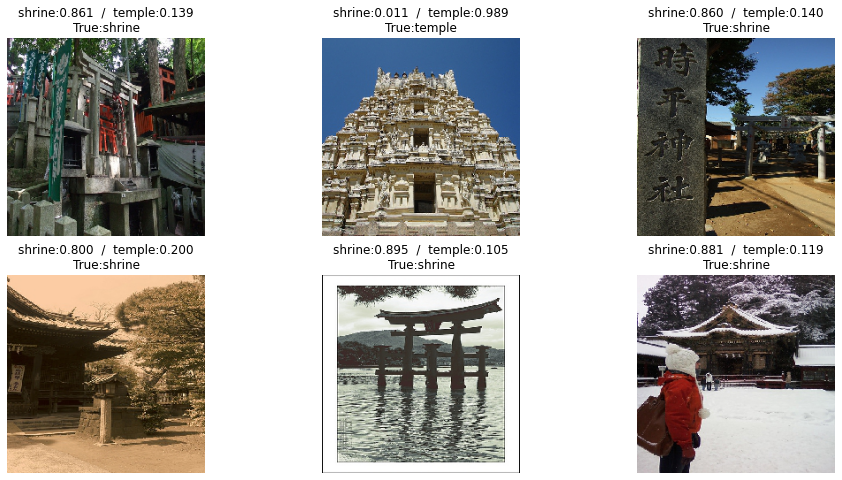

In [99]:
import importlib
import utils
importlib.reload(utils)
#from utils import show_test_samples

show_test_samples(
    x_test, probs,
    img_itr_train.class_indices,
    true_labels
)

In [53]:
type(x_test)

numpy.ndarray